In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage.draw import polygon2mask
from scipy import ndimage
from IPython.display import display, clear_output

In [5]:
t = np.linspace(0,2*np.pi,11)   

canvas = np.zeros((1024,1024))
a = 0.5
xs = np.array([np.cos(t[0:-2:2]), a*np.cos(t[1:-1:2])])
ys = np.array([np.sin(t[0:-2:2]), a*np.sin(t[1:-1:2])])
star = np.array([np.concatenate(xs.T), np.concatenate(ys.T)]).T

t = np.linspace(0,2*np.pi,1000)
circle = np.array([np.cos(t), np.sin(t)]).T

star_mask = polygon2mask((1024,1024), (star*40) + 100)
circle_mask = polygon2mask((1024,1024), (circle*100) + 500)
all_mask = star_mask + circle_mask

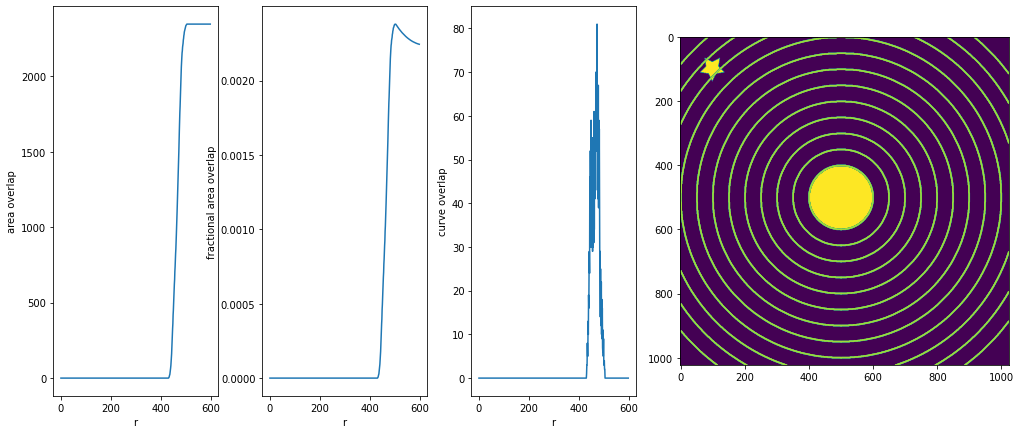

In [6]:
fig, ax = plt.subplots(1,4, figsize=(14,6), gridspec_kw={'width_ratios': [1, 1, 1, 2]})
fig.subplots_adjust(wspace=0.4)
plt.tight_layout()
ax[3].imshow(all_mask)

D = ndimage.distance_transform_edt(circle_mask==0)
r_max = 600
f = np.zeros(r_max)
g = np.zeros(r_max)
for i in range(0,r_max):
    K = D<=i
    f[i] = np.count_nonzero(K*star_mask)
    g[i] = np.count_nonzero(K)
    if (i%50==0):
        ax[3].contour(K)
        display(fig)
        clear_output(wait = True)
        

ax[0].plot(f)
ax[0].set_xlabel('r')
ax[0].set_ylabel('area overlap')

ax[1].plot(f/g)
ax[1].set_xlabel('r')
ax[1].set_ylabel('fractional area overlap')

ax[2].plot(f[1:]-f[:-1])
ax[2].set_xlabel('r')
ax[2].set_ylabel('curve overlap')

plt.show()